In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_squared_error

In [6]:
df = pd.read_excel("/content/DrDoS1000.xlsx")
df = df[(df[' Label'] == 'BENIGN') | (df[' Label'] == 'DrDoS_UDP')]

In [7]:
df.shape

(2500, 66)

In [8]:
benign_count = df[df[' Label'] == 'BENIGN'].shape[0]
UDP_DDoS_count = df[df[' Label'] == 'DrDoS_UDP'].shape[0]

In [9]:
print("Number of Legitimate packets : ",benign_count)
print("Number of Malicious packets : ",UDP_DDoS_count)

Number of Legitimate packets :  1500
Number of Malicious packets :  1000


In [10]:
df[' Label'] = df[' Label'].replace({'BENIGN': 0, 'DrDoS_UDP': 1})

In [11]:
df = df.sample(frac=1,random_state=42) #Shuffling

In [12]:
df.shape

(2500, 66)

In [13]:
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
4750,115560430,16,14,514,1776,430,0,32.125000,106.110556,1770,...,20,40443.0,11830.59539,76105,36678,10000000.0,4145.879891,10000000,9993740,0
1114,51,1,1,0,0,0,0,0.000000,0.000000,0,...,32,0.0,0.00000,0,0,0.0,0.000000,0,0,0
1064,47230,1,1,81,163,81,81,81.000000,0.000000,163,...,20,0.0,0.00000,0,0,0.0,0.000000,0,0,0
7862,205,2,2,68,220,34,34,34.000000,0.000000,110,...,20,0.0,0.00000,0,0,0.0,0.000000,0,0,0
5736,643902,7,2,11607,26,4380,0,1658.142857,2117.853979,20,...,20,0.0,0.00000,0,0,0.0,0.000000,0,0,0


In [14]:
df.tail()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
6824,11995942,1,7,6,42,6,6,6.000000,0.000000,6,...,20,37267.0,0.0,37267,37267,12000000.0,0.0,12000000,12000000,0
1095,220,2,2,86,406,43,43,43.000000,0.000000,203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1130,33863400,13,8,834,4849,357,0,64.153846,116.348504,1448,...,32,140077.0,0.0,140077,140077,33700000.0,0.0,33700000,33700000,0
2344,4,3,0,65,0,53,6,21.666667,27.135463,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
860,1,2,0,750,0,375,375,375.000000,0.000000,0,...,-1,0.0,0.0,0,0,0.0,0.0,0,0,1


In [32]:
# Separate the features and the target
X = df.drop(columns=[' Label'])  # Replace 'target' with your actual target column name
y = df[' Label']

In [33]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 35,
                                        criterion ='entropy', max_features = 15)
# Training the model
extra_tree_forest.fit(X, y)
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)

In [47]:
# Get the indices of the top 15 features by importance
top_15_indices = np.argsort(feature_importance_normalized)[-15:][::-1]

# Display the indices and their corresponding importance values
print("Indices of top 15 features:", top_15_indices)
print("Importance of top 15 features:", feature_importance_normalized[top_15_indices])

Indices of top 15 features: [56  6 33  7 40 39 32 35  9 30 38  5  3 36 34]
Importance of top 15 features: [0.33073352 0.29682127 0.27101711 0.20558037 0.18818968 0.16069068
 0.12224704 0.12152642 0.10673205 0.09482356 0.09184367 0.08973109
 0.08800371 0.06904655 0.06795907]


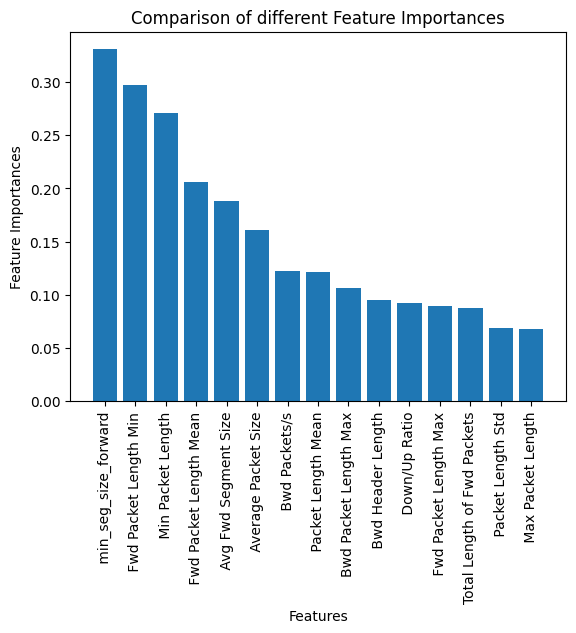

In [48]:
top_15_feature_names = [X.columns[i] for i in top_15_indices]
#Plotting a Bar Graph to show the top 15 features selected by the Extra Tree Classifier
plt.bar(top_15_feature_names,feature_importance_normalized[top_15_indices])
plt.xlabel('Features')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.xticks(rotation=90)  # Rotate feature names if they are too long
plt.show()

In [66]:
X = df[top_15_feature_names]
X.shape

(2500, 15)

In [67]:
categorical_features = X.columns
high_cardinality_features = [feature for feature in categorical_features if df[feature].nunique() > 10]
low_cardinality_features = [feature for feature in categorical_features if df[feature].nunique() <= 10]
print("The high cardinality features are : ",high_cardinality_features)
print("The low cardinality features are : ",low_cardinality_features)

The high cardinality features are :  [' Fwd Packet Length Min', ' Min Packet Length', ' Fwd Packet Length Mean', ' Avg Fwd Segment Size', ' Average Packet Size', ' Bwd Packets/s', ' Packet Length Mean', 'Bwd Packet Length Max', ' Bwd Header Length', ' Fwd Packet Length Max', 'Total Length of Fwd Packets', ' Packet Length Std', ' Max Packet Length']
The low cardinality features are :  [' min_seg_size_forward', ' Down/Up Ratio']


In [73]:
# Apply Label encoding for high cardinality features
for feature in high_cardinality_features:
    X.loc[:, feature] = LabelEncoder().fit_transform(X[feature])

# Apply One-Hot encoding for low cardinality features and scaling for high cardinality features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), low_cardinality_features),
        ('scaler', StandardScaler(), high_cardinality_features)
    ],
    remainder='passthrough'
)

# Transform the DataFrame
X_new = preprocessor.fit_transform(X)
print("Dimensions are : ",X_new.shape)
print("Data type is : ",type(X_new))

Dimensions are :  (2500, 28)
Data type is :  <class 'numpy.ndarray'>


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [75]:
# Initialize the Random Forest model with default hyperparameters
model = RandomForestClassifier(random_state=42)
# Fit the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
# Define the parameter grid
param_grid = {
    'n_estimators': (10,20,30,40,50),
    'max_depth': (5,10,20),
    'min_samples_split': (2,5,10,20),
    'min_samples_leaf': (1,3,5,10)
}

In [77]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)
# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [78]:
# Fit the model
grid_search.fit(X_train, y_train)
# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)
# Use the best estimator found by GridSearchCV
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [79]:
# Predict on the test data
y_pred = best_rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,

In [80]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)